In [2]:
# Import necessary libraries

import re
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from textblob import TextBlob
import plotly.graph_objects as go
import plotly.express as ex
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
# Read data from CSV files
modi_data = pd.read_csv('modi_reviews.csv')
rahul_data = pd.read_csv('rahul_reviews.csv')

In [5]:
# Explore the Modi data
modi_data.shape

(25688, 3)

In [6]:
modi_data.sample(10)

,Unnamed: 0,User,Tweet
18949,18949,knikesonmyfeet,@bhupendrachaube @narendramodi You're probably...
22604,22604,abhishek_cabm,#RahulLovesTerrorists\nThis man wants to be PM...
15933,15933,srvicky21,@timesofindia Award wapasi gang is also silent...
3681,3681,ArjunVeerIsa,@dhaval8456 @INCIndia @narendramodi @BJP4India...
12659,12659,digitalsashtra,@narendramodi \nPlease do something about thes...
16157,16157,ChetanP_tweets,@rohini_sgh @narendramodi Some interesting fac...
16335,16335,RndRam,@drharshvardhan Good luck to we the Indians on...
17448,17448,SreyashiDey,CM @MamataOfficial distances herself from the ...
23612,23612,SShrivastaw,I am waiting for shri @narendramodi ji's tweet...
7662,7662,TheHeartOfIndia,@IndiaToday He criticized every single step of...


In [7]:
# Explore the Rahul data
rahul_data.shape

(14261, 3)

In [8]:
rahul_data.sample(10)

,Unnamed: 0,User,Tweet
2048,2048,arshpath,#MukeshAmbani released a message in support of...
11705,11705,poorboypappu,@ABHIJIT_LS @smritiirani @INCIndia @RahulGandh...
6801,6801,gowri_gowd,"All sorts of jumlas, gimmics, propaganda and c..."
1690,1690,GaneshPoovaiah,@BDUTT @RahulGandhi Gyaan from a #INC boot lic...
13013,13013,KannaPhaneendra,@INCIndia @RahulGandhi What prevented you Mr. ...
402,402,TheWhiteTiger_6,Congress president Rahul Gandhi on Monday said...
1983,1983,saudsultan,@RahulGandhi fight BJP with this not what they...
11807,11807,sharmars003,Peoples like @sampitroda @RahulGandhi @priyank...
4080,4080,TarunMendiratt7,"In the midst of election,releasing movies like..."
13254,13254,whatanews4u,@rjfahad @vivekagnihotri @RahulGandhi @Swamy39...


In [9]:
modi_data['Tweet'][3]

'PM Modi creates a new record of being the only PM of a democratic country. \nCongratulations our pm welcome to the Heart of India again 🙏🙏🙏🙏🙏🙏🙏 .#Elections2019 #PMModi #DeshKaGauravModi #2020Election #BJP #India'

In [10]:
modi_data['Tweet'][10:20]

,Tweet
10,#BJP was renamed as Safroon Party then again i...
11,All Pakistanis had serious doubts on concept o...
12,"@ajaymaken @RahulGandhi And as a final touch, ..."
13,I think before casting the vote for last phas...
14,Trying to forge opposition will be a futile ex...
15,#LokSabhaElections2019 Anyone not having mass ...
16,#ElectionCommission #LokSabhaElections2019 PM'...
17,@INCIndia should release a video of @RahulGand...
18,@KajalChauhan_ @dashingassu Our PM ( Modi ji) ...
19,Howmany Seats will BJP win ?\n\n#LokSabhaElect...


# Text Cleaning

In [11]:
# Define a function for text preprocessing
def preprocess_modi_text_data(data, text_column_name):
    # Lowercasing
    data[text_column_name] = data[text_column_name].str.lower()

    # Check and handle missing values
    print(f"Data type of '{text_column_name}' column before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' column before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])

    # Convert the column to strings
    data.loc[:, text_column_name] = data[text_column_name].astype(str)

    # Remove special characters, emojis, and emoticons
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s😀-🙁]', '', x))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

    # Stemming
    stemmer = PorterStemmer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

    # Remove numbers
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'\d+', '', x))

    return data

# Apply text preprocessing to Modi data
modi_data = preprocess_modi_text_data(modi_data, 'Tweet')
modi_data = modi_data.drop('Unnamed: 0', axis=1)

# Explore the cleaned Modi data
modi_data.head()

Data type of 'Tweet' column before handling missing values: object
Number of missing values in 'Tweet' column before handling missing values: 5


,User,Tweet
0,advosushildixit,anjanaomkashyap see futur bjp spokesperson goo...
1,jiaeur,loksabhaelect rd may reveal even ecisveep coul...
2,PVenkatGandhi,loksabhaelect rd may reveal even ecisveep coul...
3,TheNirbhay1,pm modi creat new record pm democrat countri c...
4,ShakeChilli,abhijitmajumd appoint successor god forbid all...


In [12]:
rahul_data['Tweet'][3]

'@ajaymaken @RahulGandhi And as a final touch, #Modi ji proved this world that not Rahul but he is the real #Pappu thereby making @RahulGandhi the perfect fit for the future!\n\nThank you Modi ji 😅\n#BJP #Congress #RahulGandhi #Elections2019'

In [13]:
rahul_data['Tweet'][5:15]

,Tweet
5,@INCIndia should release a video of @RahulGand...
6,@thakkar_sameet @BDUTT @surjitbhalla 4/n smack...
7,"Rahul Gandhi Spotted in Switzerland, 1 hour ag..."
8,BJP will be nowhere in India after May 23. BJP...
9,#Punjab \nBhatinda- cong- Sad neck to neck \n...
10,@IYCTelangana @IncBasavakalyan @narendramodi @...
11,@ani_digital @ANI @rssurjewala IF #ECI #SunilA...
12,My Predictions\n\nBJP+NDA = 300 to 310\nCongre...
13,"Siddaramaiah, Mallikarjun Kharge, Dinesh Gundu..."
14,@RahulGandhi RG Next PM of india #LokSabhaElec...


In [14]:
# Apply text preprocessing to Rahul data
def preprocess_rahul_text_data(data, text_column_name):
    # Lowercasing
    data[text_column_name] = data[text_column_name].str.lower()

    # Check and handle missing values
    print(f"Data type of '{text_column_name}' column before handling missing values: {data[text_column_name].dtype}")
    print(f"Number of missing values in '{text_column_name}' column before handling missing values: {data[text_column_name].isnull().sum()}")
    data = data.dropna(subset=[text_column_name])

    # Convert the column to strings
    data.loc[:, text_column_name] = data[text_column_name].astype(str)

    # Remove special characters, emojis, and emoticons
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'[^a-zA-Z\s😀-🙁]', '', x))

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

    # Stemming
    stemmer = PorterStemmer()
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(x)]))

    # Remove numbers
    data.loc[:, text_column_name] = data[text_column_name].apply(lambda x: re.sub(r'\d+', '', x))

    return data

rahul_data = preprocess_rahul_text_data(rahul_data, 'Tweet')
rahul_data = rahul_data.drop('Unnamed: 0', axis=1)
rahul_data.head()

Data type of 'Tweet' column before handling missing values: object
Number of missing values in 'Tweet' column before handling missing values: 0


,User,Tweet
0,Sunnysweet16,wonder academ journalist ask inc india rahul g...
1,drnitinchaube,congrat chang australiavot scottmorrison sir w...
2,mrvivek07,peopel say govt ne year kya kiya uns pucho yea...
3,JosephPravinP,ajaymaken rahulgandhi final touch modi ji prov...
4,VandanaMegastar,loksabhaelect anyon mass back cant visionari p...


In [15]:
# Define a function to find the polarity of a review using TextBlob
def find_polarity(review):
    return TextBlob(review).sentiment.polarity

In [16]:
# Apply polarity analysis to Modi data
modi_data['Polarity'] = modi_data['Tweet'].apply(find_polarity)

# Apply polarity analysis to Rahul data
rahul_data['Polarity'] = rahul_data['Tweet'].apply(find_polarity)

In [17]:
modi_data.head()

,User,Tweet,Polarity
0,advosushildixit,anjanaomkashyap see futur bjp spokesperson goo...,0.193750
1,jiaeur,loksabhaelect rd may reveal even ecisveep coul...,0.800000
2,PVenkatGandhi,loksabhaelect rd may reveal even ecisveep coul...,0.800000
3,TheNirbhay1,pm modi creat new record pm democrat countri c...,0.578788
4,ShakeChilli,abhijitmajumd appoint successor god forbid all...,0.274091


In [18]:
rahul_data.head()

,User,Tweet,Polarity
0,Sunnysweet16,wonder academ journalist ask inc india rahul g...,0.000000
1,drnitinchaube,congrat chang australiavot scottmorrison sir w...,0.000000
2,mrvivek07,peopel say govt ne year kya kiya uns pucho yea...,0.000000
3,JosephPravinP,ajaymaken rahulgandhi final touch modi ji prov...,0.480000
4,VandanaMegastar,loksabhaelect anyon mass back cant visionari p...,-0.166667


In [19]:
# Assign sentiment labels based on polarity
modi_data['Label'] = np.where(modi_data['Polarity'] > 0, 'positive', 'negative')
modi_data['Label'][modi_data['Polarity'] == 0] = 'neutral'

rahul_data['Label'] = np.where(rahul_data['Polarity'] > 0, 'positive', 'negative')
rahul_data['Label'][rahul_data['Polarity'] == 0] = 'neutral'

<ipython-input-19-531b3c4ae76c>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  modi_data['Label'][modi_data['Polarity'] == 0] = 'neutral'
<ipython-input-19-531b3c4ae76c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [20]:
modi_data.sample(20)

,User,Tweet,Polarity,Label
7978,StarPyramid,modi learn crawl india alreadi host asian game...,-0.200000,negative
6263,Priyanshi11G,ani consid prime minist modi elect citizen ind...,0.800000,positive
18216,aby_swa,shefvaidya narendramodi rahulgandhi smritiiran...,0.411111,positive
197,gajender00,modi get nd term pm worri opposit worri amit s...,0.800000,positive
23211,Royz593,narendramodi firecrackera leader india need mu...,0.200000,positive
7490,viki_im,narendramodi hell chokidar plan vision next ye...,-0.200000,negative
20935,ImRupalGautam,india enter rlite space power th countri world...,0.800000,positive
16214,prateekpatro3,modihiaayega loksabhaelect simpl question nare...,0.115000,positive
9024,VickeyRajak2,bjp request bjp rss parti nda would get full m...,0.206250,positive
11496,Na_sir106,arnabgoswamirtv majgaurav well done arvindkejr...,0.150000,positive


In [21]:
rahul_data.sample(20)

,User,Tweet,Polarity,Label
998,Avinash02716985,rajeevmp siddaramaiah sherryontopp rahulgandhi...,0.400000,positive
10385,GhotalePatil,rahulgandhi india imrankhanpti sam pitroda ind...,0.136364,positive
4075,iamTapanPandya,rahulgandhi priyankagandhi incindia stop think...,0.500000,positive
13260,kumardurgesh262,rahulgandhi siri think like elderbrotheri twee...,0.000000,neutral
9458,MVGopalRaju,indiatoday rahulgandhi narendramodi rahulgandh...,-0.125000,negative
3624,FlashT123,hey arnab republ kid wait nitingadkari piyushg...,0.000000,neutral
7130,PR2345678,pareshdhanani thesandipborad peopl seva call g...,0.000000,neutral
6279,samaruna,cnnnew rahulgandhi happi valentin day rahul bj...,0.500000,positive
216,bptsan,historian amp free thinker let us label either...,0.400000,positive
384,nallaganesh,nagarajukr waglenikhil grandfath vote indira g...,0.000000,neutral


In [22]:
# Remove neutral Modi reviews
neutral_modi_reviews = modi_data[modi_data['Polarity'] == 0.0000]
remove_modi_neutral_reviews = modi_data['Polarity'].isin(neutral_modi_reviews['Polarity'])
modi_data.drop(modi_data[remove_modi_neutral_reviews].index, inplace=True)

# Remove neutral Rahul reviews
neutral_rahul_reviews = rahul_data[rahul_data['Polarity'] == 0.0000]
remove_rahul_neutral_reviews = rahul_data['Polarity'].isin(neutral_rahul_reviews['Polarity'])
rahul_data.drop(rahul_data[remove_rahul_neutral_reviews].index, inplace=True)

In [23]:
print(neutral_modi_reviews.shape)
print(modi_data.shape)
print('\n')
print(neutral_rahul_reviews.shape)
print(rahul_data.shape)

(9702, 4)
(15981, 4)


(5849, 4)
(8412, 4)


In [24]:
# Randomly remove reviews to balance the dataset
np.random.seed(10)
remove_n_modi = 8481
drop_indices_modi = np.random.choice(modi_data.index, remove_n_modi, replace=True)
df_modi_data = modi_data.drop(drop_indices_modi)

np.random.seed(10)
remove_n_rahul = 360
drop_indices_rahul = np.random.choice(rahul_data.index, remove_n_rahul, replace=True)
df_rahul_data = rahul_data.drop(drop_indices_rahul)

In [25]:
print(modi_data.shape)
print(rahul_data.shape)
print('\n')
print(df_modi_data.shape)
print(df_rahul_data.shape)

(15981, 4)
(8412, 4)


(9393, 4)
(8057, 4)


# Prediction about Election on the bases of polarity and sentiment score

In [26]:
# Calculate the percentage of negative and positive reviews for Modi
modi_count = df_modi_data.groupby('Label').count()

modi_total_reviews = len(df_modi_data)
neg_modi = (modi_count['Polarity'][0] / modi_total_reviews) * 100
pos_modi = (modi_count['Polarity'][1] / modi_total_reviews) * 100

# Calculate the percentage of negative and positive reviews for Rahul
rahul_count = df_rahul_data.groupby('Label').count()

rahul_total_reviews = len(df_rahul_data)
neg_rahul = (rahul_count['Polarity'][0] / rahul_total_reviews) * 100
pos_rahul = (rahul_count['Polarity'][1] / rahul_total_reviews) * 100

<ipython-input-26-5fed1b1a65df>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neg_modi = (modi_count['Polarity'][0] / modi_total_reviews) * 100
<ipython-input-26-5fed1b1a65df>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pos_modi = (modi_count['Polarity'][1] / modi_total_reviews) * 100
<ipython-input-26-5fed1b1a65df>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  neg_rahul = (rahul_count['Polarity'][0] / rahul_total_review

In [27]:
print(f'Percentage of negative reviews for Modi: {neg_modi:.2f}%')
print(f'Percentage of positive reviews for Modi: {pos_modi:.2f}%')
print('\n')
print(f'Percentage of negative reviews for Rahul: {neg_rahul:.2f}%')
print(f'Percentage of positive reviews for Rahul: {pos_rahul:.2f}%')

Percentage of negative reviews for Modi: 25.08%
Percentage of positive reviews for Modi: 74.92%


Percentage of negative reviews for Rahul: 30.72%
Percentage of positive reviews for Rahul: 69.28%


In [28]:
# Calculate average polarity for each candidate
modi_data['Polarity'] = modi_data['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)
rahul_data['Polarity'] = rahul_data['Tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calculate total sentiment score
modi_total_polarity = modi_data['Polarity'].sum()
rahul_total_polarity = rahul_data['Polarity'].sum()

# Determine the winner
if modi_total_polarity > rahul_total_polarity:
    winner = "Modi"
else:
    winner = "Rahul"

print(f"The predicted winner is: {winner}")


The predicted winner is: Modi


In [29]:
politicians = ['Narendra Modi', 'Rahul Gandhi']
neg_list = [neg_modi, neg_rahul]
pos_list = [pos_modi, pos_rahul]

fig = go.Figure(
    data=[
        go.Bar(name = 'Negative', x = politicians, y = neg_list, marker_color = 'red'),
        go.Bar(name = 'Positive', x = politicians, y = pos_list, marker_color = 'green')
    ]
)
fig.update_layout(barmode = 'group')
fig.show()

# Creating word clouds for both Modi and Rahul reviews

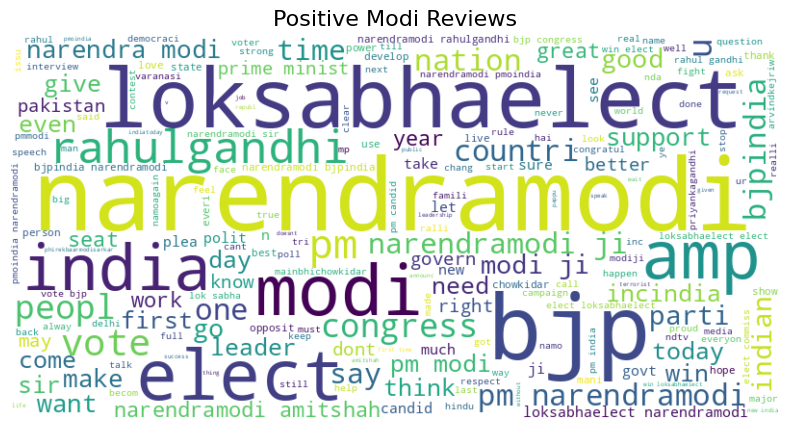

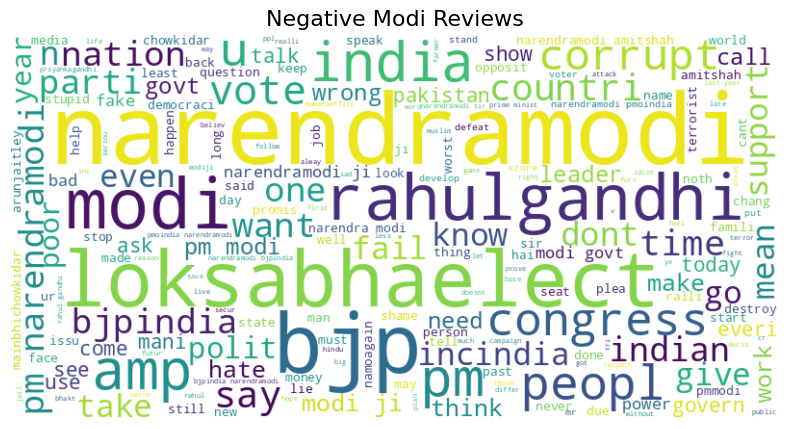

In [30]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative Modi reviews
positive_modi_reviews = df_modi_data[df_modi_data['Label'] == 'positive']['Tweet']
negative_modi_reviews = df_modi_data[df_modi_data['Label'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_modi_text = ' '.join(positive_modi_reviews)
negative_modi_text = ' '.join(negative_modi_reviews)

# Generate and display word clouds for Modi
generate_word_cloud(positive_modi_text, 'Positive Modi Reviews')
generate_word_cloud(negative_modi_text, 'Negative Modi Reviews')

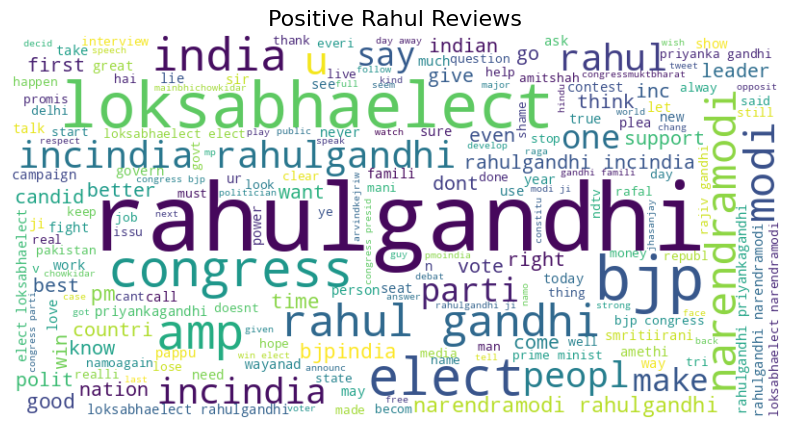

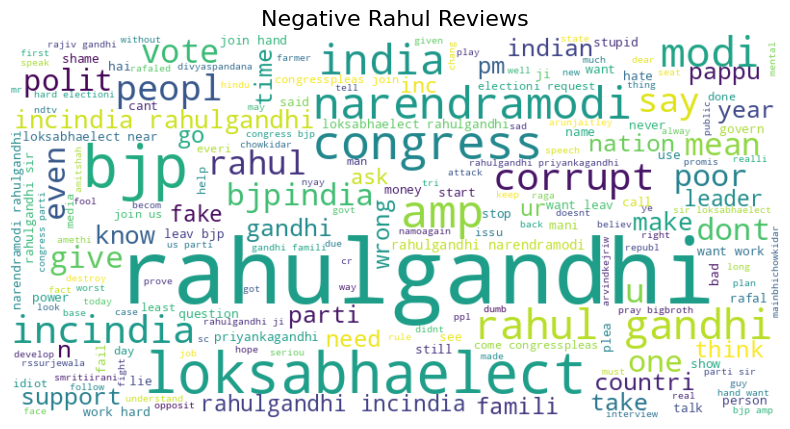

In [31]:
# Create a function to generate and display word clouds
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Separate positive and negative Modi reviews
positive_rahul_reviews = df_rahul_data[df_rahul_data['Label'] == 'positive']['Tweet']
negative_rahul_reviews = df_rahul_data[df_rahul_data['Label'] == 'negative']['Tweet']

# Join the reviews into single strings
positive_rahul_text = ' '.join(positive_rahul_reviews)
negative_rahul_text = ' '.join(negative_rahul_reviews)

# Generate and display word clouds for Modi
generate_word_cloud(positive_rahul_text, 'Positive Rahul Reviews')
generate_word_cloud(negative_rahul_text, 'Negative Rahul Reviews')